In [2]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import multiprocessing as multi
from datetime import datetime
import scipy.integrate as integrate
import numpy as np 

print(datetime.now())

2021-07-28 11:44:56.404959


In [3]:
data_address = 'Data/'
dpi = 120

In [ ]:
%%time

table = Table.read(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North.fits', format='fits')

# print(table)

names = [name for name in table.colnames if len(table[name].shape) <= 1]
df_north = table[names].to_pandas()

# df_north = table.to_pandas()

print(datetime.now())
df_north.describe()

In [5]:
df_north[['RA', 'DEC', 'Z']].describe()

,RA,DEC,Z
count,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,0.455062
std,39.000977,17.995544,0.155204
min,108.937131,-3.628120,-0.011447
25%,152.141058,13.152102,0.352654
50%,184.641353,26.955008,0.489353
75%,217.078796,42.385037,0.564193
max,263.907507,68.737699,1.002166


2021-07-28 11:45:29.559549


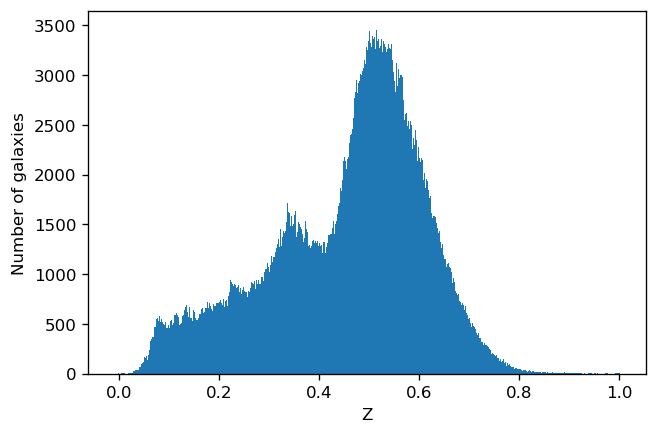

In [6]:
plt.figure(dpi = dpi)
plt.hist(df_north['Z'], bins = 1000);
plt.xlabel('Z')
plt.ylabel('Number of galaxies')
print(datetime.now())

In [7]:
df_north_pos_z = df_north[df_north['Z'] > 0]
df_north_pos_z.describe()

,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,...,9.531930e+05,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,3744.575764,3.480431,190.045211,526.466500,22.121051,13685.160683,6644.178946,1.141741,...,3.469543e-04,0.987201,4730.550378,469.441076,55504.633551,22.352188,11135.269964,0.001025,94502.315741,0.846043
std,38.999948,17.995523,1299.835047,1.574764,141.917793,302.146071,10.049019,9395.851709,3555.646624,0.105763,...,2.913079e-04,0.017168,1694.391087,280.848799,1132.384028,10.054813,5279.554828,0.031999,140131.281732,0.983232
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.023293e-08,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.140573,13.151964,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,2.396823e-04,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6214.000000,1.000000
50%,184.639602,26.954585,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6804.000000,1.123701,...,3.300774e-04,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.076180,42.384830,4670.000000,5.000000,252.000000,716.000000,31.000000,21620.000000,9101.000000,1.199153,...,4.038898e-04,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.000000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,2.511126e-02,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [8]:
omega_m = 0.272            #matter density paratmeter from Komatsu et al. (2011) 
omega_l = 0.728            #vacuum density paratmeter from Komatsu et al. (2011) 

H_o = 70.4                 #Hubble constant in km s^−1 Mpc^−1 from Komatsu et al. (2011) 
c = 2.99792458e5           #speed of light in km/s 

def comov_dist_func(z):                   #comoving distance in Mpc using Eq. 4.53 in Peter (2015)
    
    a_low = 1/(1+z)
    integral_val = integrate.quad(lambda a: 1 / np.sqrt((a * omega_m) + 
                                 (a**2 * (1 - omega_m - omega_l)) + (a**4 * omega_l)), 
                                  a_low, 1)[0]
    x = (c/H_o) * integral_val
    
    return x

for z in [0, 1, 5, 10, 100, 1000, 10000]:
    print(z, comov_dist_func(z))

0 0.0
1 3341.499531443971
5 7983.314981719827
10 9721.194350150332
100 13019.32876151407
1000 14128.101155535027
10000 14480.95726974795


In [12]:
%%time
df_north_pos_z.insert(3, 'r_comov[Mpc]', df_north_pos_z['Z'].apply(comov_dist_func))

CPU times: user 56.7 s, sys: 0 ns, total: 56.7 s
Wall time: 56.7 s


In [24]:

df_north_pos_z = df_north_pos_z.drop(columns=['X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]'])
df_north_pos_z.insert(4, 'X_comov[Mpc]', 
                      df_north_pos_z['r_comov[Mpc]'] * 
                      np.cos(np.deg2rad(df_north_pos_z['RA'])) *
                      np.cos(np.deg2rad(df_north_pos_z['DEC'])))

df_north_pos_z.insert(5, 'Y_comov[Mpc]', 
                      df_north_pos_z['r_comov[Mpc]'] * 
                      np.sin(np.deg2rad(df_north_pos_z['RA'])) *
                      np.cos(np.deg2rad(df_north_pos_z['DEC'])))

df_north_pos_z.insert(6, 'Z_comov[Mpc]', 
                      df_north_pos_z['r_comov[Mpc]'] * 
                      np.sin(np.deg2rad(df_north_pos_z['DEC'])))

print(datetime.now())
df_north_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc]', 'X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]']].describe()

2021-07-28 11:56:20.722716


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,1722.973238,-1132.579205,-95.374867,770.629981
std,38.999948,17.995523,0.155186,542.633771,529.673370,900.685635,534.413927
min,108.937131,-3.628120,0.000005,0.020839,-3324.868651,-2869.954481,-169.629469
25%,152.140573,13.151964,0.352676,1387.110665,-1529.566090,-780.656430,319.011132
50%,184.639602,26.954585,0.489364,1861.078447,-1103.678118,-90.058189,708.617250
75%,217.076180,42.384830,0.564200,2105.790707,-724.002122,578.157392,1166.896547
max,263.907507,68.737699,1.002166,3346.908056,-0.004399,2823.749805,2957.134516


In [25]:
%%time
df_north_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc]', 'X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]']].to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv')

CPU times: user 10.3 s, sys: 988 ms, total: 11.3 s
Wall time: 11.5 s


In [ ]:
print(np.cos(90))

print(np.cos(np.deg2rad(90)))

In [26]:
%%time
df_north_pos_z = pd.read_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv', 
                index_col = 0)
df_north_pos_z.describe()

CPU times: user 1.22 s, sys: 3.15 s, total: 4.37 s
Wall time: 4.64 s


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,1722.973238,-1132.579205,-95.374867,770.629981
std,38.999948,17.995523,0.155186,542.633771,529.673370,900.685635,534.413927
min,108.937131,-3.628120,0.000005,0.020839,-3324.868651,-2869.954481,-169.629469
25%,152.140573,13.151964,0.352676,1387.110665,-1529.566090,-780.656430,319.011132
50%,184.639602,26.954585,0.489364,1861.078447,-1103.678118,-90.058189,708.617250
75%,217.076180,42.384830,0.564200,2105.790707,-724.002122,578.157392,1166.896547
max,263.907507,68.737699,1.002166,3346.908056,-0.004399,2823.749805,2957.134516


In [27]:
%%time

df_north_pos_z_small = df_north_pos_z.head()
df_north_pos_z_small

CPU times: user 75 µs, sys: 54 µs, total: 129 µs
Wall time: 132 µs


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
0,195.071285,-0.590771,0.465648,1781.367209,-1720.002206,-463.167564,-18.367182
1,195.022992,-0.610999,0.565802,2110.919078,-2038.655928,-547.133115,-22.510282
2,195.079741,0.348981,0.612211,2257.440924,-2179.664794,-587.291970,13.749676
3,195.170574,0.359864,0.502060,1903.319574,-1836.954601,-498.076588,11.954319
4,195.204289,0.347267,0.559173,2089.674464,-2016.492267,-548.030921,12.665346


In [37]:
from astropy.cosmology import WMAP7 as cosmo

print('Astropy Comoving distances')
cosmo.comoving_distance(df_north_pos_z_small['Z'])

Astropy Comoving distances


<Quantity [1781.28900736, 2110.80547656, 2257.30907125, 1903.22918236,
           2089.56328301] Mpc>

**27 July, 2021**  
A: For the paper, we should use Planck cosmology when dealing with observations. For (Magneticum simulations), we can continue with WMAP7 cosmology.

In [35]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra = df_north_pos_z_small['RA'] * u.degree, 
             dec = df_north_pos_z_small['DEC'] * u.degree, 
             distance = cosmo.comoving_distance(df_north_pos_z_small['Z']))

print('Astropy X coordinates')
c.cartesian.x 

Astropy X coordinates


<Quantity [-1719.92669806, -2038.54621606, -2179.53748402, -1836.86736149,
           -2016.38497988] Mpc>

In [38]:
print('Astropy Y coordinates')
c.cartesian.y

Astropy Y coordinates


<Quantity [-463.14723069, -547.10367079, -587.257667  , -498.05293365,
           -548.00176341] Mpc>

In [39]:
print('Astropy z coordinates')
c.cartesian.z

Astropy z coordinates


<Quantity [-18.36637557, -22.50907087,  13.74887249,  11.95375174,
            12.66467229] Mpc>

In [42]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_north_pos_z_sample = df_north_pos_z.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_north_pos_z_sample['X_comov[Mpc]'], 
           df_north_pos_z_sample['Y_comov[Mpc]'], 
           df_north_pos_z_sample['Z_comov[Mpc]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-07-28 12:12:57.447756


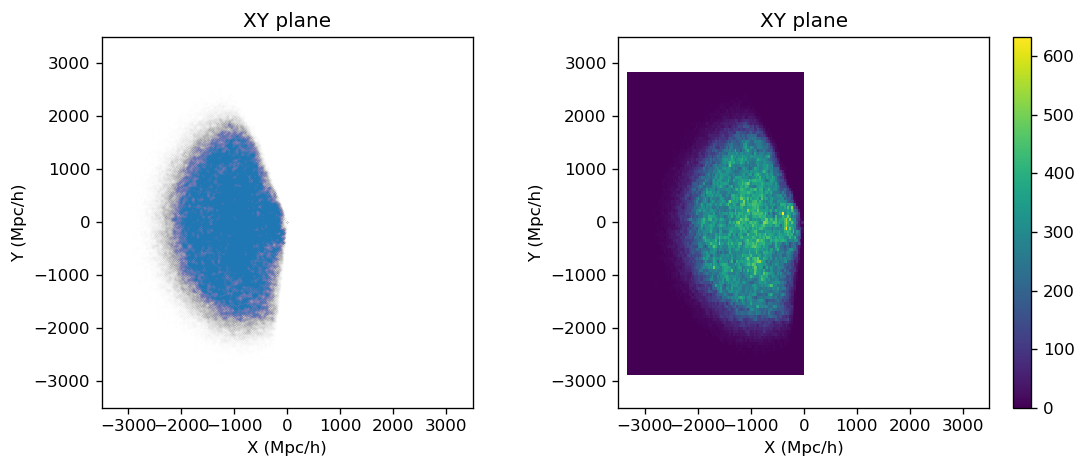

In [31]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

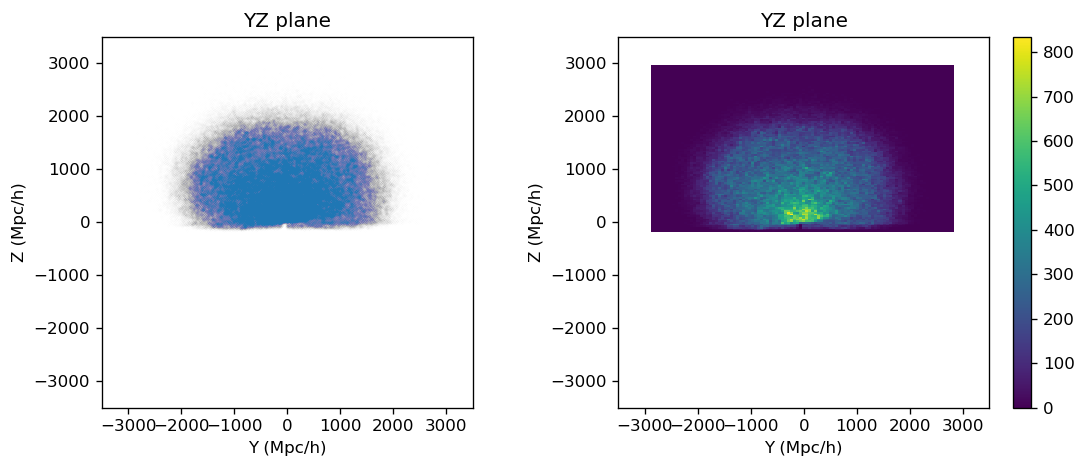

In [32]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

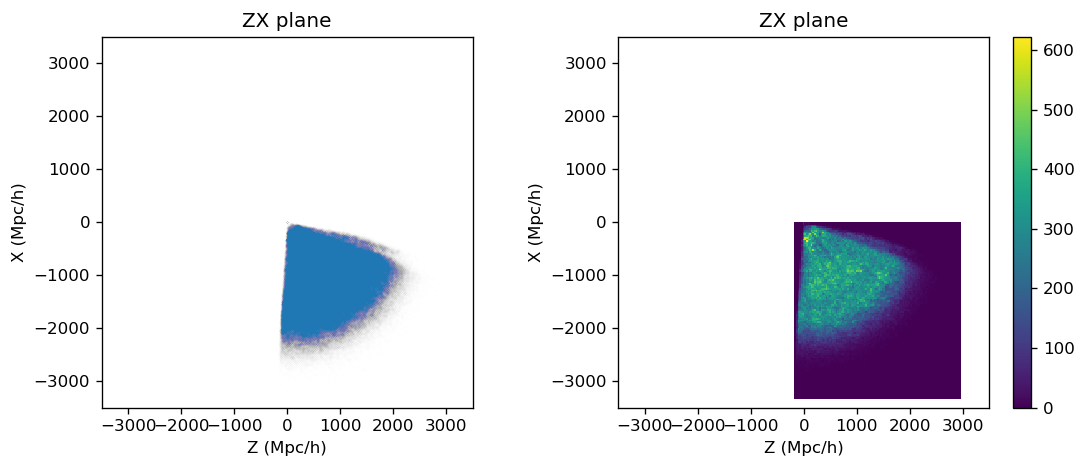

In [33]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['X_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['X_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();

**27 July, 2021**  
**Task** Include southern galaxies as well.  
**Task** Use WHL clusters.  
**Task** Attend ACT workshop. They'll show how to use ACT cluster catalog which is better than Planck and overlaps with SLOAN skys. In the end if we want to make a physical conclusion about custers velocity error and tau error, this will be a good data set. We can use this WHL catalog but this are optical catalog. Planck map is actually very good because of many frequencies but sensitivity or resolution is much worse.

We will use some kind of CMB data to draw conclusions about gas mass or optical depth etc.

If mass trend is there, then people have been underestimating the velocities and overestimating the gas mass. This can an interesting result.